# Import Libraries

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Patch

# Load Data

In [2]:
lsoa_supply = pd.read_csv("Data/Output/lsoa_supply.csv")
lsoa_demand = gpd.read_file("Data/Output/lsoa_demand.shp")
lsoa = gpd.read_file("Data/manchester_lsoa/manchester_lsoa.shp")
lsoa_outline = gpd.read_file("Data/manchester_lsoa/manchester_outline.shp")

## LSOA Supply

In [3]:
lsoa_supply

,Unnamed: 0,lsoa21cd,lsoa21nm,geometry,area_sqkm,bus_stops_count,bus_stops_density,nearest_station_distance
0,0,E01004901,Bolton 028E,POLYGON ((366003.09300000034 406666.6879999991...,0.354363,4,11.287876,583.787237
1,1,E01005001,Bury 012B,POLYGON ((375480.34800000023 408593.1229999997...,0.238302,4,16.785438,2682.823140
2,2,E01004840,Bolton 012A,"POLYGON ((367374.7810000004 411954.5940000005,...",4.181101,25,5.979287,2153.166001
3,3,E01005006,Bury 012D,"POLYGON ((377212.6880000001 410849.5, 377231.9...",1.772635,26,14.667433,2828.181650
4,4,E01004773,Bolton 003D,POLYGON ((371776.55900000036 412463.2035000007...,0.266227,9,33.805782,1467.288813
...,...,...,...,...,...,...,...,...
1697,1697,E01006410,Wigan 020E,POLYGON ((357596.9539999999 403017.37549999915...,0.628715,8,12.724362,2090.861678
1698,1698,E01006400,Wigan 021D,"POLYGON ((356213.7599999998 403792.3969999999,...",0.569408,1,1.756210,588.128763
1699,1699,E01006331,Wigan 031D,POLYGON ((367336.96999999974 401009.4519999996...,0.596520,6,10.058336,3640.594673
1700,1700,E01006397,Wigan 011C,POLYGON ((354859.3119999999 406046.90399999917...,0.147755,4,27.071827,1516.597364


In [4]:
lsoa_supply = lsoa_supply.rename(columns={"Unnamed: 0" : "n_lsoa"})
lsoa_supply["station_distance_inverse"] = 1 / lsoa_supply["nearest_station_distance"]

In [5]:
lsoa_supply["nearest_station_distance_norm"] = (lsoa_supply["station_distance_inverse"] - lsoa_supply["station_distance_inverse"].min()) / (lsoa_supply["station_distance_inverse"].max() - lsoa_supply["station_distance_inverse"].min()) 

print(lsoa_supply.nearest_station_distance_norm.max())
print(lsoa_supply.nearest_station_distance_norm.min())

1.0
0.0


In [6]:
lsoa_supply["bus_stops_density_norm"] = (lsoa_supply["bus_stops_density"] - lsoa_supply["bus_stops_density"].min()) / (lsoa_supply["bus_stops_density"].max() - lsoa_supply["bus_stops_density"].min())
lsoa_supply["bus_stops_density_norm"]

print(lsoa_supply.bus_stops_density_norm.max())
print(lsoa_supply.bus_stops_density_norm.min())

1.0
0.0


In [7]:
lsoa_supply.nlargest(10, "nearest_station_distance_norm")

,n_lsoa,lsoa21cd,lsoa21nm,geometry,area_sqkm,bus_stops_count,bus_stops_density,nearest_station_distance,station_distance_inverse,nearest_station_distance_norm,bus_stops_density_norm
591,591,E01033983,Salford 021I,"POLYGON ((379749 398692, 379760.32629999984 39...",0.835204,33,39.511315,13.167773,0.075943,1.000000,0.104236
855,855,E01033997,Salford 037C,"POLYGON ((381267.5889999997 397583.4065000005,...",0.283584,27,95.209971,26.788935,0.037329,0.490598,0.253100
907,907,E01034131,Manchester 060E,"POLYGON ((383426.3540000003 397692.0529999994,...",0.095903,11,114.699681,56.106500,0.017823,0.233278,0.305189
468,468,E01005176,Manchester 043E,"POLYGON ((384664.7549999999 391565.9450000003,...",0.274708,12,43.682685,57.699951,0.017331,0.226784,0.115385
791,791,E01005125,Manchester 040A,"POLYGON ((385971.4620000003 391986.3019999992,...",0.229112,7,30.552720,60.255510,0.016596,0.217088,0.080293
510,510,E01033662,Manchester 057C,"POLYGON ((384073.2249999996 397814.0879999995,...",0.144958,18,124.174290,60.398737,0.016557,0.216568,0.330512
660,660,E01033654,Manchester 055C,"POLYGON ((384762.1160000004 398315.7670000009,...",0.277819,26,93.586138,67.443837,0.014827,0.193753,0.248760
266,266,E01006290,Wigan 022A,POLYGON ((368728.46949999966 404022.4155000001...,0.504252,12,23.797621,74.523319,0.013419,0.175171,0.062239
1127,1127,E01005477,Rochdale 017B,"POLYGON ((388516 411343, 388573 411303, 388577...",0.446944,27,60.410242,75.307379,0.013279,0.173328,0.160092
1490,1490,E01005900,Stockport 010C,POLYGON ((394105.83800000045 391125.9360000007...,0.602970,17,28.193754,86.611861,0.011546,0.150464,0.073988


In [8]:
n_supply = 2 ## Number of variables considered in the index
lsoa_supply["pt_supply"] = (lsoa_supply["nearest_station_distance_norm"] + lsoa_supply["bus_stops_density_norm"]) / n_supply

In [9]:
lsoa_supply

,n_lsoa,lsoa21cd,lsoa21nm,geometry,area_sqkm,bus_stops_count,bus_stops_density,nearest_station_distance,station_distance_inverse,nearest_station_distance_norm,bus_stops_density_norm,pt_supply
0,0,E01004901,Bolton 028E,POLYGON ((366003.09300000034 406666.6879999991...,0.354363,4,11.287876,583.787237,0.001713,0.020749,0.028804,0.024777
1,1,E01005001,Bury 012B,POLYGON ((375480.34800000023 408593.1229999997...,0.238302,4,16.785438,2682.823140,0.000373,0.003069,0.043498,0.023283
2,2,E01004840,Bolton 012A,"POLYGON ((367374.7810000004 411954.5940000005,...",4.181101,25,5.979287,2153.166001,0.000464,0.004278,0.014616,0.009447
3,3,E01005006,Bury 012D,"POLYGON ((377212.6880000001 410849.5, 377231.9...",1.772635,26,14.667433,2828.181650,0.000354,0.002816,0.037837,0.020326
4,4,E01004773,Bolton 003D,POLYGON ((371776.55900000036 412463.2035000007...,0.266227,9,33.805782,1467.288813,0.000682,0.007142,0.088987,0.048065
...,...,...,...,...,...,...,...,...,...,...,...,...
1697,1697,E01006410,Wigan 020E,POLYGON ((357596.9539999999 403017.37549999915...,0.628715,8,12.724362,2090.861678,0.000478,0.004461,0.032644,0.018552
1698,1698,E01006400,Wigan 021D,"POLYGON ((356213.7599999998 403792.3969999999,...",0.569408,1,1.756210,588.128763,0.001700,0.020582,0.003330,0.011956
1699,1699,E01006331,Wigan 031D,POLYGON ((367336.96999999974 401009.4519999996...,0.596520,6,10.058336,3640.594673,0.000275,0.001775,0.025518,0.013647
1700,1700,E01006397,Wigan 011C,POLYGON ((354859.3119999999 406046.90399999917...,0.147755,4,27.071827,1516.597364,0.000659,0.006850,0.070990,0.038920


<Axes: title={'center': 'Public Transportation Supply Index'}, xlabel='n_lsoa', ylabel='pt_supply'>

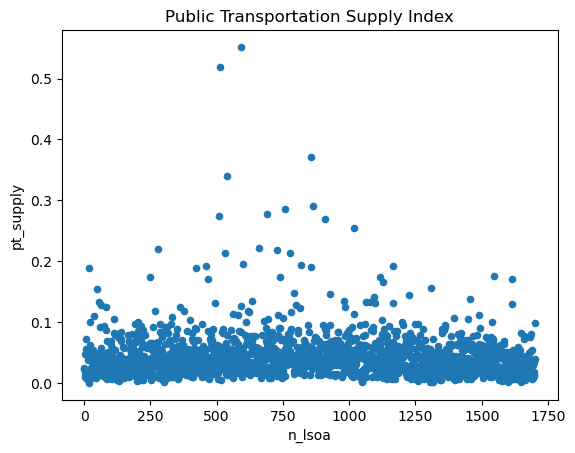

In [10]:
lsoa_supply.plot.scatter(x= "n_lsoa", y= "pt_supply", title="Public Transportation Supply Index")

In [11]:
## Create new dataframe for sorted pt_supply
lsoa_supply_sorted = lsoa_supply.sort_values(by="pt_supply", ascending=True).reset_index(drop=True)
lsoa_supply_sorted["index"] = lsoa_supply_sorted.index

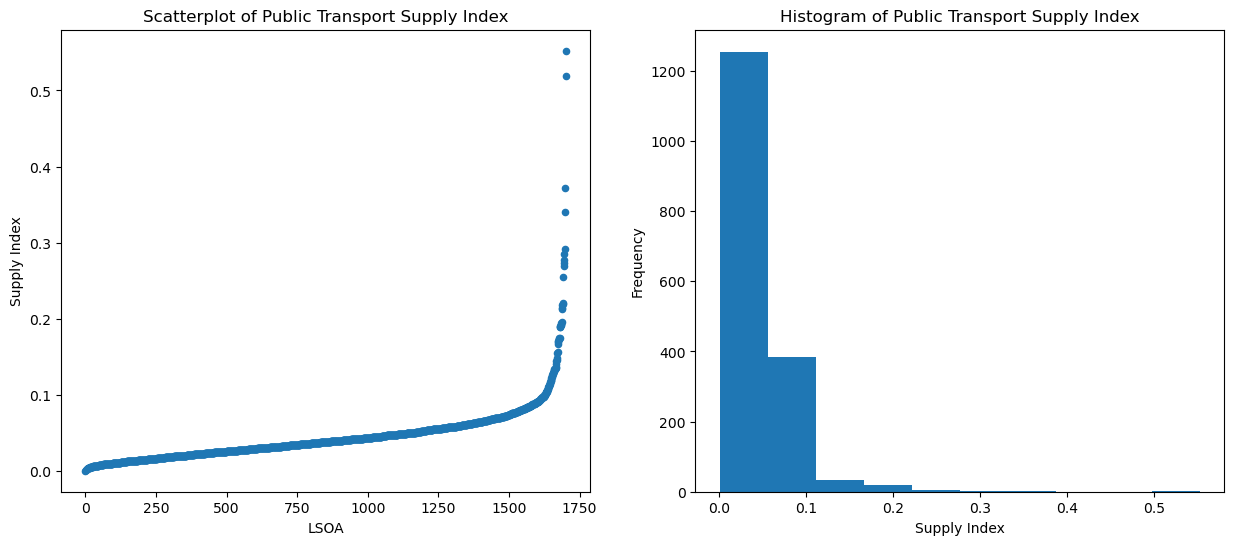

In [12]:
# Plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

## Scatter plot
lsoa_supply_sorted.plot.scatter(ax=axes[0], x="index", y="pt_supply", title="Scatterplot of Public Transport Supply Index")
axes[0].set_xlabel("LSOA")
axes[0].set_ylabel("Supply Index")

## Create Histogram for pt_supply
lsoa_supply.pt_supply.hist(ax=axes[1], grid=False)
axes[1].set_title('Histogram of Public Transport Supply Index')
axes[1].set_xlabel('Supply Index')
axes[1].set_ylabel('Frequency')
plt.show()

### LSOA Demand

In [13]:
lsoa_demand

,lsoa21cd,lsoa21nm,area_sqkm,Total,pop_densit,women_perc,elderly_pe,children_p,dis_nc_per,deprived_p,geometry
0,E01004901,Bolton 028E,0.354363,1773,5003.350923,5.922166,29.606439,15.172025,5.045278,6.856404,"POLYGON ((366003.093 406666.688, 366004.412 40..."
1,E01005001,Bury 012B,0.238302,1228,5153.129520,4.885993,22.384853,19.218241,2.828283,7.676768,"POLYGON ((375480.348 408593.123, 375481.063 40..."
2,E01004840,Bolton 012A,4.181101,1769,423.094327,4.578858,30.275798,19.106840,7.756233,9.418283,"POLYGON ((367374.781 411954.594, 367387.095 41..."
3,E01005006,Bury 012D,1.772635,2051,1157.034831,6.874695,25.688674,20.234032,7.434944,10.532838,"POLYGON ((377212.688 410849.500, 377231.906 41..."
4,E01004773,Bolton 003D,0.266227,1985,7456.052936,7.103275,25.395631,19.143577,8.974359,8.158508,"POLYGON ((371776.559 412463.204, 371825.243 41..."
...,...,...,...,...,...,...,...,...,...,...,...
1697,E01006410,Wigan 020E,0.628715,1261,2005.677534,4.758128,33.287718,15.543220,5.617978,7.490637,"POLYGON ((357596.954 403017.375, 357616.740 40..."
1698,E01006400,Wigan 021D,0.569408,1982,3480.807917,6.004036,18.415945,26.135217,2.057613,7.270233,"POLYGON ((356213.760 403792.397, 356213.312 40..."
1699,E01006331,Wigan 031D,0.596520,1501,2516.260480,3.997335,28.514146,16.122585,3.125000,5.625000,"POLYGON ((367336.970 401009.452, 367340.657 40..."
1700,E01006397,Wigan 011C,0.147755,1058,7160.498266,7.088847,32.333539,16.446125,17.636684,19.047619,"POLYGON ((354859.312 406046.904, 354861.775 40..."


In [14]:
## Rename column to make it easier to understand
lsoa_demand = lsoa_demand.rename(columns={"women_perc" : "women_percent", "elderly_pe" : "elderly_percent", "children_p" : "child_percent", "pop_densit" : "pop_dens", "disabled_n" : "dis_no_car", "deprived_p" : "deprived_percent"})
lsoa_demand

,lsoa21cd,lsoa21nm,area_sqkm,Total,pop_dens,women_percent,elderly_percent,child_percent,dis_nc_per,deprived_percent,geometry
0,E01004901,Bolton 028E,0.354363,1773,5003.350923,5.922166,29.606439,15.172025,5.045278,6.856404,"POLYGON ((366003.093 406666.688, 366004.412 40..."
1,E01005001,Bury 012B,0.238302,1228,5153.129520,4.885993,22.384853,19.218241,2.828283,7.676768,"POLYGON ((375480.348 408593.123, 375481.063 40..."
2,E01004840,Bolton 012A,4.181101,1769,423.094327,4.578858,30.275798,19.106840,7.756233,9.418283,"POLYGON ((367374.781 411954.594, 367387.095 41..."
3,E01005006,Bury 012D,1.772635,2051,1157.034831,6.874695,25.688674,20.234032,7.434944,10.532838,"POLYGON ((377212.688 410849.500, 377231.906 41..."
4,E01004773,Bolton 003D,0.266227,1985,7456.052936,7.103275,25.395631,19.143577,8.974359,8.158508,"POLYGON ((371776.559 412463.204, 371825.243 41..."
...,...,...,...,...,...,...,...,...,...,...,...
1697,E01006410,Wigan 020E,0.628715,1261,2005.677534,4.758128,33.287718,15.543220,5.617978,7.490637,"POLYGON ((357596.954 403017.375, 357616.740 40..."
1698,E01006400,Wigan 021D,0.569408,1982,3480.807917,6.004036,18.415945,26.135217,2.057613,7.270233,"POLYGON ((356213.760 403792.397, 356213.312 40..."
1699,E01006331,Wigan 031D,0.596520,1501,2516.260480,3.997335,28.514146,16.122585,3.125000,5.625000,"POLYGON ((367336.970 401009.452, 367340.657 40..."
1700,E01006397,Wigan 011C,0.147755,1058,7160.498266,7.088847,32.333539,16.446125,17.636684,19.047619,"POLYGON ((354859.312 406046.904, 354861.775 40..."


In [15]:
lsoa_demand["pop_dens_inverse"] = 1 / lsoa_demand["pop_dens"]

In [16]:
## Calculate normalised value of each column

lsoa_demand["women_percent_norm"] = (lsoa_demand["women_percent"] - lsoa_demand["women_percent"].min()) / (lsoa_demand["women_percent"].max() - lsoa_demand["women_percent"].min())

lsoa_demand["elderly_percent_norm"] = (lsoa_demand["elderly_percent"] - lsoa_demand["elderly_percent"].min())/ (lsoa_demand["elderly_percent"].max() - lsoa_demand["elderly_percent"].min())

lsoa_demand["child_percent_norm"] = (lsoa_demand["child_percent"] - lsoa_demand["child_percent"].min()) / (lsoa_demand["child_percent"].max() - lsoa_demand["child_percent"].min())

lsoa_demand["pop_dens_norm"] = (lsoa_demand["pop_dens_inverse"] - lsoa_demand["pop_dens_inverse"].min()) / (lsoa_demand["pop_dens_inverse"].max() - lsoa_demand["pop_dens_inverse"].min())

lsoa_demand["dis_nc_norm"] = (lsoa_demand["dis_nc_per"] - lsoa_demand["dis_nc_per"].min()) / (lsoa_demand["dis_nc_per"].max() - lsoa_demand["dis_nc_per"].min())

lsoa_demand["deprived_percent_norm"] = (lsoa_demand["deprived_percent"] - lsoa_demand["deprived_percent"].min()) / (lsoa_demand["deprived_percent"].max() - lsoa_demand["deprived_percent"].min())

In [17]:
lsoa_demand.nsmallest(10, "pop_dens_norm")

,lsoa21cd,lsoa21nm,area_sqkm,Total,pop_dens,women_percent,elderly_percent,child_percent,dis_nc_per,deprived_percent,geometry,pop_dens_inverse,women_percent_norm,elderly_percent_norm,child_percent_norm,pop_dens_norm,dis_nc_norm,deprived_percent_norm
522,E01033684,Manchester 062D,0.048328,1791,37059.608501,32.216639,34.015446,2.065885,9.430255,6.385069,"POLYGON ((385659.317 398106.322, 385686.000 39...",0.000027,0.644853,0.606757,0.036548,0.000000,0.242771,0.121833
495,E01005233,Manchester 063B,0.103451,2898,28013.206537,8.005521,13.112682,35.369220,14.758270,22.900763,"POLYGON ((387458.393 395575.643, 387460.779 39...",0.000036,0.120265,0.102118,0.625732,0.000545,0.399373,0.607126
457,E01033994,Salford 036B,0.041129,1134,27571.876659,34.038801,37.040459,0.440917,6.436421,5.808477,"POLYGON ((382588.604 397521.079, 382579.001 39...",0.000036,0.684334,0.679788,0.007800,0.000581,0.154775,0.104890
958,E01034125,Manchester 025G,0.061067,1553,25430.948631,11.461687,14.195859,34.256278,14.936248,18.579235,"POLYGON ((384585.997 395319.512, 384586.570 39...",0.000039,0.195150,0.128269,0.606043,0.000771,0.404604,0.480144
606,E01034138,Manchester 064B,0.058235,1363,23405.017785,7.703595,12.377373,35.363169,18.101545,21.854305,"POLYGON ((387609.305 394859.598, 387607.616 39...",0.000043,0.113723,0.084366,0.625625,0.000984,0.497640,0.576378
856,E01033673,Manchester 059D,0.064342,1411,21929.579992,29.128278,31.901366,0.779589,7.342657,3.846154,"POLYGON ((382812.854 397513.965, 382833.000 39...",0.000046,0.577937,0.555719,0.013792,0.001164,0.181412,0.047230
509,E01005614,Salford 031C,0.164076,3119,19009.510033,7.053543,10.036984,56.524527,16.990291,11.812298,"POLYGON ((383266.903 401400.181, 383261.307 40...",0.000053,0.099638,0.027864,1.000000,0.001602,0.464977,0.281305
486,E01034122,Manchester 024E,0.097914,1832,18710.364998,11.299127,14.699734,32.532751,15.286624,19.904459,"POLYGON ((384069.904 395401.701, 384079.263 39...",0.000053,0.191628,0.140433,0.575551,0.001654,0.414903,0.519084
877,E01034134,Manchester 061D,0.062760,1157,18435.224003,28.781331,31.268914,1.901469,7.462687,2.238806,"POLYGON ((385304.919 398882.031, 385318.000 39...",0.000054,0.570419,0.540450,0.033640,0.001704,0.184940,0.000000
764,E01005199,Manchester 064C,0.136517,2492,18254.105427,7.142857,13.047466,29.494382,13.827434,15.818584,"POLYGON ((387724.713 394809.500, 387724.320 39...",0.000055,0.101573,0.100544,0.521798,0.001738,0.372014,0.399025


In [18]:
## Calculate demand index

n_demand = 6  ## Number of variables considered in the index
lsoa_demand["pt_demand"] = (lsoa_demand["women_percent_norm"] + lsoa_demand["elderly_percent_norm"] + lsoa_demand["child_percent_norm"] + lsoa_demand["pop_dens_norm"] + lsoa_demand["dis_nc_norm"] + lsoa_demand["deprived_percent_norm"]) / n_demand

In [19]:
lsoa_demand

,lsoa21cd,lsoa21nm,area_sqkm,Total,pop_dens,women_percent,elderly_percent,child_percent,dis_nc_per,deprived_percent,geometry,pop_dens_inverse,women_percent_norm,elderly_percent_norm,child_percent_norm,pop_dens_norm,dis_nc_norm,deprived_percent_norm,pt_demand
0,E01004901,Bolton 028E,0.354363,1773,5003.350923,5.922166,29.606439,15.172025,5.045278,6.856404,"POLYGON ((366003.093 406666.688, 366004.412 40...",0.000200,0.075124,0.500314,0.268415,0.010809,0.113886,0.135682,0.184038
1,E01005001,Bury 012B,0.238302,1228,5153.129520,4.885993,22.384853,19.218241,2.828283,7.676768,"POLYGON ((375480.348 408593.123, 375481.063 40...",0.000194,0.052673,0.325969,0.339998,0.010445,0.048724,0.159788,0.156266
2,E01004840,Bolton 012A,4.181101,1769,423.094327,4.578858,30.275798,19.106840,7.756233,9.418283,"POLYGON ((367374.781 411954.594, 367387.095 41...",0.002364,0.046018,0.516474,0.338027,0.146081,0.193568,0.210960,0.241855
3,E01005006,Bury 012D,1.772635,2051,1157.034831,6.874695,25.688674,20.234032,7.434944,10.532838,"POLYGON ((377212.688 410849.500, 377231.906 41...",0.000864,0.095763,0.405731,0.357969,0.052347,0.184124,0.243710,0.223274
4,E01004773,Bolton 003D,0.266227,1985,7456.052936,7.103275,25.395631,19.143577,8.974359,8.158508,"POLYGON ((371776.559 412463.204, 371825.243 41...",0.000134,0.100716,0.398656,0.338677,0.006698,0.229371,0.173943,0.208010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,E01006410,Wigan 020E,0.628715,1261,2005.677534,4.758128,33.287718,15.543220,5.617978,7.490637,"POLYGON ((357596.954 403017.375, 357616.740 40...",0.000499,0.049903,0.589188,0.274982,0.029484,0.130719,0.154319,0.204766
1698,E01006400,Wigan 021D,0.569408,1982,3480.807917,6.004036,18.415945,26.135217,2.057613,7.270233,"POLYGON ((356213.760 403792.397, 356213.312 40...",0.000287,0.076898,0.230151,0.462369,0.016274,0.026072,0.147842,0.159935
1699,E01006331,Wigan 031D,0.596520,1501,2516.260480,3.997335,28.514146,16.122585,3.125000,5.625000,"POLYGON ((367336.970 401009.452, 367340.657 40...",0.000397,0.033418,0.473944,0.285232,0.023159,0.057445,0.099499,0.162116
1700,E01006397,Wigan 011C,0.147755,1058,7160.498266,7.088847,32.333539,16.446125,17.636684,19.047619,"POLYGON ((354859.312 406046.904, 354861.775 40...",0.000140,0.100403,0.566152,0.290956,0.007044,0.483976,0.493906,0.323740


Text(0.5, 1.0, 'Public Transportation Demand Index')

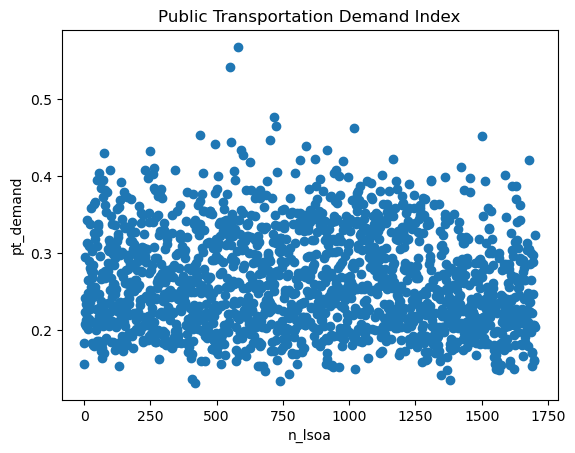

In [20]:
plt.scatter(range(len(lsoa_demand)), lsoa_demand["pt_demand"])
plt.xlabel("n_lsoa")
plt.ylabel("pt_demand")
plt.title("Public Transportation Demand Index")

In [21]:
## Create new dataframe for sorted pt_demand
lsoa_demand_sorted = lsoa_demand.sort_values(by="pt_demand", ascending=True).reset_index(drop=True)
lsoa_demand_sorted["index"] = lsoa_demand_sorted.index

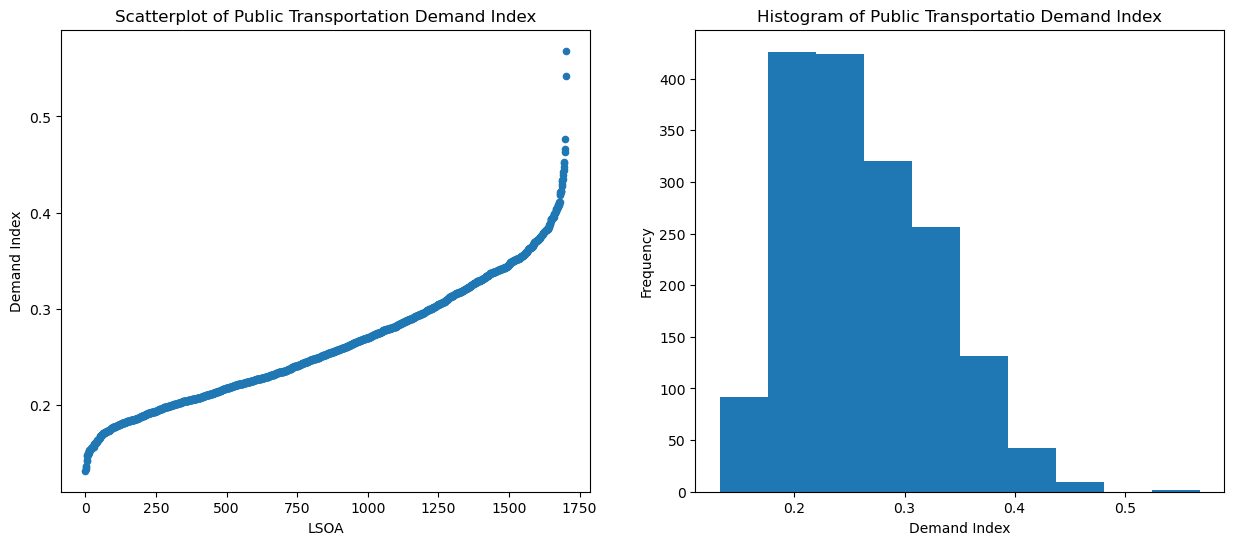

In [22]:
# Plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

## Scatter plot
lsoa_demand_sorted.plot.scatter(ax=axes[0], x="index", y="pt_demand", title="Scatterplot of Public Transportation Demand Index")
axes[0].set_xlabel("LSOA")
axes[0].set_ylabel("Demand Index")

## Create Histogram for pt_supply
lsoa_demand.pt_demand.hist(ax=axes[1], grid=False)
axes[1].set_title('Histogram of Public Transportatio Demand Index')
axes[1].set_xlabel('Demand Index')
axes[1].set_ylabel('Frequency')
plt.show()

## Merge Supply and Demand

In [23]:
## Join supply demand dataframes
pt_supply_demand = pd.merge(lsoa_supply[["lsoa21cd", "lsoa21nm", "nearest_station_distance_norm", "bus_stops_density_norm", "pt_supply"]], lsoa_demand[["lsoa21cd","women_percent_norm", "elderly_percent_norm", "child_percent_norm", "pop_dens_norm", "dis_nc_norm", "deprived_percent_norm", "pt_demand", "geometry"]], on="lsoa21cd", how="left")
pt_supply_demand

,lsoa21cd,lsoa21nm,nearest_station_distance_norm,bus_stops_density_norm,pt_supply,women_percent_norm,elderly_percent_norm,child_percent_norm,pop_dens_norm,dis_nc_norm,deprived_percent_norm,pt_demand,geometry
0,E01004901,Bolton 028E,0.020749,0.028804,0.024777,0.075124,0.500314,0.268415,0.010809,0.113886,0.135682,0.184038,"POLYGON ((366003.093 406666.688, 366004.412 40..."
1,E01005001,Bury 012B,0.003069,0.043498,0.023283,0.052673,0.325969,0.339998,0.010445,0.048724,0.159788,0.156266,"POLYGON ((375480.348 408593.123, 375481.063 40..."
2,E01004840,Bolton 012A,0.004278,0.014616,0.009447,0.046018,0.516474,0.338027,0.146081,0.193568,0.210960,0.241855,"POLYGON ((367374.781 411954.594, 367387.095 41..."
3,E01005006,Bury 012D,0.002816,0.037837,0.020326,0.095763,0.405731,0.357969,0.052347,0.184124,0.243710,0.223274,"POLYGON ((377212.688 410849.500, 377231.906 41..."
4,E01004773,Bolton 003D,0.007142,0.088987,0.048065,0.100716,0.398656,0.338677,0.006698,0.229371,0.173943,0.208010,"POLYGON ((371776.559 412463.204, 371825.243 41..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,E01006410,Wigan 020E,0.004461,0.032644,0.018552,0.049903,0.589188,0.274982,0.029484,0.130719,0.154319,0.204766,"POLYGON ((357596.954 403017.375, 357616.740 40..."
1698,E01006400,Wigan 021D,0.020582,0.003330,0.011956,0.076898,0.230151,0.462369,0.016274,0.026072,0.147842,0.159935,"POLYGON ((356213.760 403792.397, 356213.312 40..."
1699,E01006331,Wigan 031D,0.001775,0.025518,0.013647,0.033418,0.473944,0.285232,0.023159,0.057445,0.099499,0.162116,"POLYGON ((367336.970 401009.452, 367340.657 40..."
1700,E01006397,Wigan 011C,0.006850,0.070990,0.038920,0.100403,0.566152,0.290956,0.007044,0.483976,0.493906,0.323740,"POLYGON ((354859.312 406046.904, 354861.775 40..."


In [24]:
pt_supply_demand.columns

Index(['lsoa21cd', 'lsoa21nm', 'nearest_station_distance_norm',
       'bus_stops_density_norm', 'pt_supply', 'women_percent_norm',
       'elderly_percent_norm', 'child_percent_norm', 'pop_dens_norm',
       'dis_nc_norm', 'deprived_percent_norm', 'pt_demand', 'geometry'],
      dtype='object')

In [25]:
## Transform into gdf
pt_supply_demand = gpd.GeoDataFrame(pt_supply_demand, geometry="geometry")
pt_supply_demand

,lsoa21cd,lsoa21nm,nearest_station_distance_norm,bus_stops_density_norm,pt_supply,women_percent_norm,elderly_percent_norm,child_percent_norm,pop_dens_norm,dis_nc_norm,deprived_percent_norm,pt_demand,geometry
0,E01004901,Bolton 028E,0.020749,0.028804,0.024777,0.075124,0.500314,0.268415,0.010809,0.113886,0.135682,0.184038,"POLYGON ((366003.093 406666.688, 366004.412 40..."
1,E01005001,Bury 012B,0.003069,0.043498,0.023283,0.052673,0.325969,0.339998,0.010445,0.048724,0.159788,0.156266,"POLYGON ((375480.348 408593.123, 375481.063 40..."
2,E01004840,Bolton 012A,0.004278,0.014616,0.009447,0.046018,0.516474,0.338027,0.146081,0.193568,0.210960,0.241855,"POLYGON ((367374.781 411954.594, 367387.095 41..."
3,E01005006,Bury 012D,0.002816,0.037837,0.020326,0.095763,0.405731,0.357969,0.052347,0.184124,0.243710,0.223274,"POLYGON ((377212.688 410849.500, 377231.906 41..."
4,E01004773,Bolton 003D,0.007142,0.088987,0.048065,0.100716,0.398656,0.338677,0.006698,0.229371,0.173943,0.208010,"POLYGON ((371776.559 412463.204, 371825.243 41..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,E01006410,Wigan 020E,0.004461,0.032644,0.018552,0.049903,0.589188,0.274982,0.029484,0.130719,0.154319,0.204766,"POLYGON ((357596.954 403017.375, 357616.740 40..."
1698,E01006400,Wigan 021D,0.020582,0.003330,0.011956,0.076898,0.230151,0.462369,0.016274,0.026072,0.147842,0.159935,"POLYGON ((356213.760 403792.397, 356213.312 40..."
1699,E01006331,Wigan 031D,0.001775,0.025518,0.013647,0.033418,0.473944,0.285232,0.023159,0.057445,0.099499,0.162116,"POLYGON ((367336.970 401009.452, 367340.657 40..."
1700,E01006397,Wigan 011C,0.006850,0.070990,0.038920,0.100403,0.566152,0.290956,0.007044,0.483976,0.493906,0.323740,"POLYGON ((354859.312 406046.904, 354861.775 40..."


In [26]:
pt_supply_demand.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1702 entries, 0 to 1701
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   lsoa21cd                       1702 non-null   object  
 1   lsoa21nm                       1702 non-null   object  
 2   nearest_station_distance_norm  1702 non-null   float64 
 3   bus_stops_density_norm         1702 non-null   float64 
 4   pt_supply                      1702 non-null   float64 
 5   women_percent_norm             1702 non-null   float64 
 6   elderly_percent_norm           1702 non-null   float64 
 7   child_percent_norm             1702 non-null   float64 
 8   pop_dens_norm                  1702 non-null   float64 
 9   dis_nc_norm                    1702 non-null   float64 
 10  deprived_percent_norm          1702 non-null   float64 
 11  pt_demand                      1702 non-null   float64 
 12  geometry                  

In [27]:
## Normalise pt_supply and pt_demand
pt_supply_demand["pt_supply_norm"] = (pt_supply_demand["pt_supply"] - pt_supply_demand["pt_supply"].min()) / (pt_supply_demand["pt_supply"].max() - pt_supply_demand["pt_supply"].min())
pt_supply_demand["pt_demand_norm"] = (pt_supply_demand["pt_demand"] - pt_supply_demand["pt_demand"].min()) / (pt_supply_demand["pt_demand"].max() - pt_supply_demand["pt_demand"].min())

pt_supply_demand

,lsoa21cd,lsoa21nm,nearest_station_distance_norm,bus_stops_density_norm,pt_supply,women_percent_norm,elderly_percent_norm,child_percent_norm,pop_dens_norm,dis_nc_norm,deprived_percent_norm,pt_demand,geometry,pt_supply_norm,pt_demand_norm
0,E01004901,Bolton 028E,0.020749,0.028804,0.024777,0.075124,0.500314,0.268415,0.010809,0.113886,0.135682,0.184038,"POLYGON ((366003.093 406666.688, 366004.412 40...",0.043944,0.119400
1,E01005001,Bury 012B,0.003069,0.043498,0.023283,0.052673,0.325969,0.339998,0.010445,0.048724,0.159788,0.156266,"POLYGON ((375480.348 408593.123, 375481.063 40...",0.041236,0.055750
2,E01004840,Bolton 012A,0.004278,0.014616,0.009447,0.046018,0.516474,0.338027,0.146081,0.193568,0.210960,0.241855,"POLYGON ((367374.781 411954.594, 367387.095 41...",0.016152,0.251906
3,E01005006,Bury 012D,0.002816,0.037837,0.020326,0.095763,0.405731,0.357969,0.052347,0.184124,0.243710,0.223274,"POLYGON ((377212.688 410849.500, 377231.906 41...",0.035876,0.209322
4,E01004773,Bolton 003D,0.007142,0.088987,0.048065,0.100716,0.398656,0.338677,0.006698,0.229371,0.173943,0.208010,"POLYGON ((371776.559 412463.204, 371825.243 41...",0.086165,0.174340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,E01006410,Wigan 020E,0.004461,0.032644,0.018552,0.049903,0.589188,0.274982,0.029484,0.130719,0.154319,0.204766,"POLYGON ((357596.954 403017.375, 357616.740 40...",0.032659,0.166904
1698,E01006400,Wigan 021D,0.020582,0.003330,0.011956,0.076898,0.230151,0.462369,0.016274,0.026072,0.147842,0.159935,"POLYGON ((356213.760 403792.397, 356213.312 40...",0.020700,0.064158
1699,E01006331,Wigan 031D,0.001775,0.025518,0.013647,0.033418,0.473944,0.285232,0.023159,0.057445,0.099499,0.162116,"POLYGON ((367336.970 401009.452, 367340.657 40...",0.023766,0.069158
1700,E01006397,Wigan 011C,0.006850,0.070990,0.038920,0.100403,0.566152,0.290956,0.007044,0.483976,0.493906,0.323740,"POLYGON ((354859.312 406046.904, 354861.775 40...",0.069585,0.439574


In [28]:
## Create new column for calculating the difference

pt_supply_demand["demand_supply_differences"] = pt_supply_demand["pt_demand_norm"] - pt_supply_demand["pt_supply_norm"]
pt_supply_demand

,lsoa21cd,lsoa21nm,nearest_station_distance_norm,bus_stops_density_norm,pt_supply,women_percent_norm,elderly_percent_norm,child_percent_norm,pop_dens_norm,dis_nc_norm,deprived_percent_norm,pt_demand,geometry,pt_supply_norm,pt_demand_norm,demand_supply_differences
0,E01004901,Bolton 028E,0.020749,0.028804,0.024777,0.075124,0.500314,0.268415,0.010809,0.113886,0.135682,0.184038,"POLYGON ((366003.093 406666.688, 366004.412 40...",0.043944,0.119400,0.075456
1,E01005001,Bury 012B,0.003069,0.043498,0.023283,0.052673,0.325969,0.339998,0.010445,0.048724,0.159788,0.156266,"POLYGON ((375480.348 408593.123, 375481.063 40...",0.041236,0.055750,0.014514
2,E01004840,Bolton 012A,0.004278,0.014616,0.009447,0.046018,0.516474,0.338027,0.146081,0.193568,0.210960,0.241855,"POLYGON ((367374.781 411954.594, 367387.095 41...",0.016152,0.251906,0.235754
3,E01005006,Bury 012D,0.002816,0.037837,0.020326,0.095763,0.405731,0.357969,0.052347,0.184124,0.243710,0.223274,"POLYGON ((377212.688 410849.500, 377231.906 41...",0.035876,0.209322,0.173446
4,E01004773,Bolton 003D,0.007142,0.088987,0.048065,0.100716,0.398656,0.338677,0.006698,0.229371,0.173943,0.208010,"POLYGON ((371776.559 412463.204, 371825.243 41...",0.086165,0.174340,0.088175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,E01006410,Wigan 020E,0.004461,0.032644,0.018552,0.049903,0.589188,0.274982,0.029484,0.130719,0.154319,0.204766,"POLYGON ((357596.954 403017.375, 357616.740 40...",0.032659,0.166904,0.134245
1698,E01006400,Wigan 021D,0.020582,0.003330,0.011956,0.076898,0.230151,0.462369,0.016274,0.026072,0.147842,0.159935,"POLYGON ((356213.760 403792.397, 356213.312 40...",0.020700,0.064158,0.043457
1699,E01006331,Wigan 031D,0.001775,0.025518,0.013647,0.033418,0.473944,0.285232,0.023159,0.057445,0.099499,0.162116,"POLYGON ((367336.970 401009.452, 367340.657 40...",0.023766,0.069158,0.045392
1700,E01006397,Wigan 011C,0.006850,0.070990,0.038920,0.100403,0.566152,0.290956,0.007044,0.483976,0.493906,0.323740,"POLYGON ((354859.312 406046.904, 354861.775 40...",0.069585,0.439574,0.369989


In [29]:
## Create a column for diff_rank
## The higher the rank -> Need DRT

## Sort df by 'demand_supply_differences' in descending order
pt_supply_demand_sorted = pt_supply_demand.sort_values(by="demand_supply_differences", ascending=False)

## Create the 'rank' column
pt_supply_demand_sorted["diff_rank"] = range(1, len(pt_supply_demand_sorted) + 1)
pt_supply_demand_sorted

,lsoa21cd,lsoa21nm,nearest_station_distance_norm,bus_stops_density_norm,pt_supply,women_percent_norm,elderly_percent_norm,child_percent_norm,pop_dens_norm,dis_nc_norm,deprived_percent_norm,pt_demand,geometry,pt_supply_norm,pt_demand_norm,demand_supply_differences,diff_rank
549,E01005610,Salford 034C,0.033137,0.078302,0.055720,0.776303,0.820214,0.195232,0.012601,0.694277,0.754513,0.542190,"POLYGON ((382382.589 399864.740, 382401.425 39...",0.100043,0.940230,0.840187,1
579,E01005210,Manchester 019C,0.017069,0.207636,0.112353,0.846960,0.869194,0.163253,0.003561,0.785691,0.740958,0.568269,"POLYGON ((384153.632 396891.980, 384161.000 39...",0.202717,1.000000,0.797283,2
715,E01005918,Stockport 014D,0.008930,0.063355,0.036143,0.087678,0.352856,0.415174,0.011102,0.995911,0.995982,0.476451,"POLYGON ((390022.732 391318.291, 390000.000 39...",0.064550,0.789565,0.725015,3
723,E01005281,Manchester 026B,0.007067,0.074958,0.041013,0.872976,0.962122,0.033302,0.009474,0.510101,0.406356,0.465722,"POLYGON ((386220.184 394924.368, 386227.904 39...",0.073380,0.764976,0.691597,4
437,E01005754,Stockport 004B,0.035268,0.064255,0.049762,0.122807,0.234103,0.418846,0.012186,0.978436,0.952437,0.453136,"POLYGON ((390607.548 393101.450, 390611.942 39...",0.089241,0.736131,0.646890,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,E01034131,Manchester 060E,0.233278,0.305189,0.269234,0.525498,0.497090,0.040291,0.004520,0.228268,0.042877,0.223090,"POLYGON ((383426.354 397692.053, 383431.000 39...",0.487138,0.208901,-0.278236,1698
541,E01032909,Salford 033F,0.026146,0.654672,0.340409,0.663599,0.637577,0.022589,0.003487,0.174130,0.103250,0.267439,"POLYGON ((383832.622 398865.622, 383832.250 39...",0.616178,0.310541,-0.305637,1699
855,E01033997,Salford 037C,0.490598,0.253100,0.371849,0.476893,0.461002,0.111811,0.016386,0.186978,0.230879,0.247325,"POLYGON ((381267.589 397583.407, 381275.086 39...",0.673177,0.264443,-0.408734,1700
591,E01033983,Salford 021I,1.000000,0.104236,0.552118,0.332498,0.335244,0.316318,0.039624,0.396620,0.461382,0.313614,"POLYGON ((379749.000 398692.000, 379760.326 39...",1.000000,0.416368,-0.583632,1701


## Plot Supply and Demand

Text(0.5, 1.0, 'Public Transportation Supply Index')

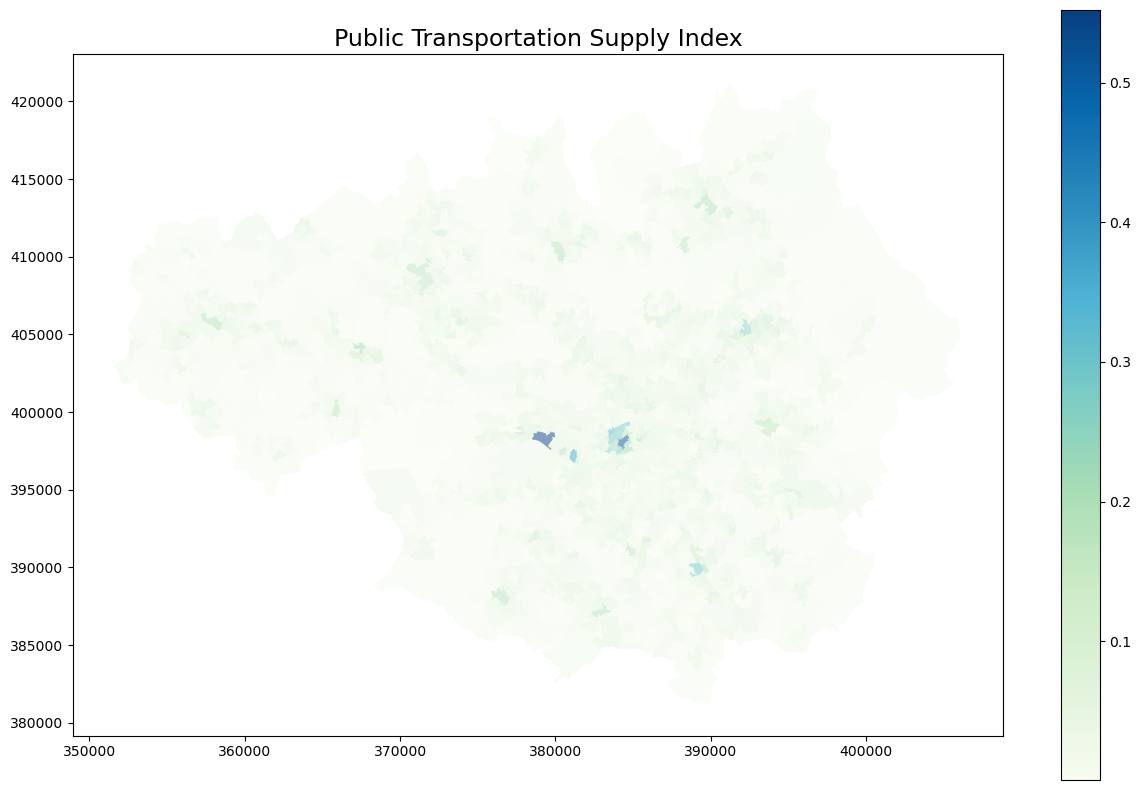

In [30]:
## Set up the plots
fig, ax = plt.subplots(1,1 , figsize=(15, 10))

## Plot Supply Map
pt_supply_demand_sorted.plot(ax=ax, column='pt_supply', legend=True, cmap='GnBu')
lsoa.plot(ax=ax, facecolor="white", alpha=0.5, edgecolor="none", linewidth=0.5)
ax.set_title("Public Transportation Supply Index", fontsize=17)
#ax.axis("off")

In [37]:
pt_supply_demand_sorted.nlargest(5, "pt_demand_norm")

,lsoa21cd,lsoa21nm,nearest_station_distance_norm,bus_stops_density_norm,pt_supply,women_percent_norm,elderly_percent_norm,child_percent_norm,pop_dens_norm,dis_nc_norm,deprived_percent_norm,pt_demand,geometry,pt_supply_norm,pt_demand_norm,demand_supply_differences,diff_rank
579,E01005210,Manchester 019C,0.017069,0.207636,0.112353,0.846960,0.869194,0.163253,0.003561,0.785691,0.740958,0.568269,"POLYGON ((384153.632 396891.980, 384161.000 39...",0.202717,1.000000,0.797283,2
549,E01005610,Salford 034C,0.033137,0.078302,0.055720,0.776303,0.820214,0.195232,0.012601,0.694277,0.754513,0.542190,"POLYGON ((382382.589 399864.740, 382401.425 39...",0.100043,0.940230,0.840187,1
715,E01005918,Stockport 014D,0.008930,0.063355,0.036143,0.087678,0.352856,0.415174,0.011102,0.995911,0.995982,0.476451,"POLYGON ((390022.732 391318.291, 390000.000 39...",0.064550,0.789565,0.725015,3
723,E01005281,Manchester 026B,0.007067,0.074958,0.041013,0.872976,0.962122,0.033302,0.009474,0.510101,0.406356,0.465722,"POLYGON ((386220.184 394924.368, 386227.904 39...",0.073380,0.764976,0.691597,4
1019,E01005350,Oldham 014B,0.017042,0.492435,0.254738,0.125589,0.274390,0.468431,0.011093,0.983125,0.912753,0.462564,"POLYGON ((392130.907 405966.432, 392131.000 40...",0.460858,0.757738,0.296880,488


Text(0.5, 1.0, 'Public Transportation Demand Index')

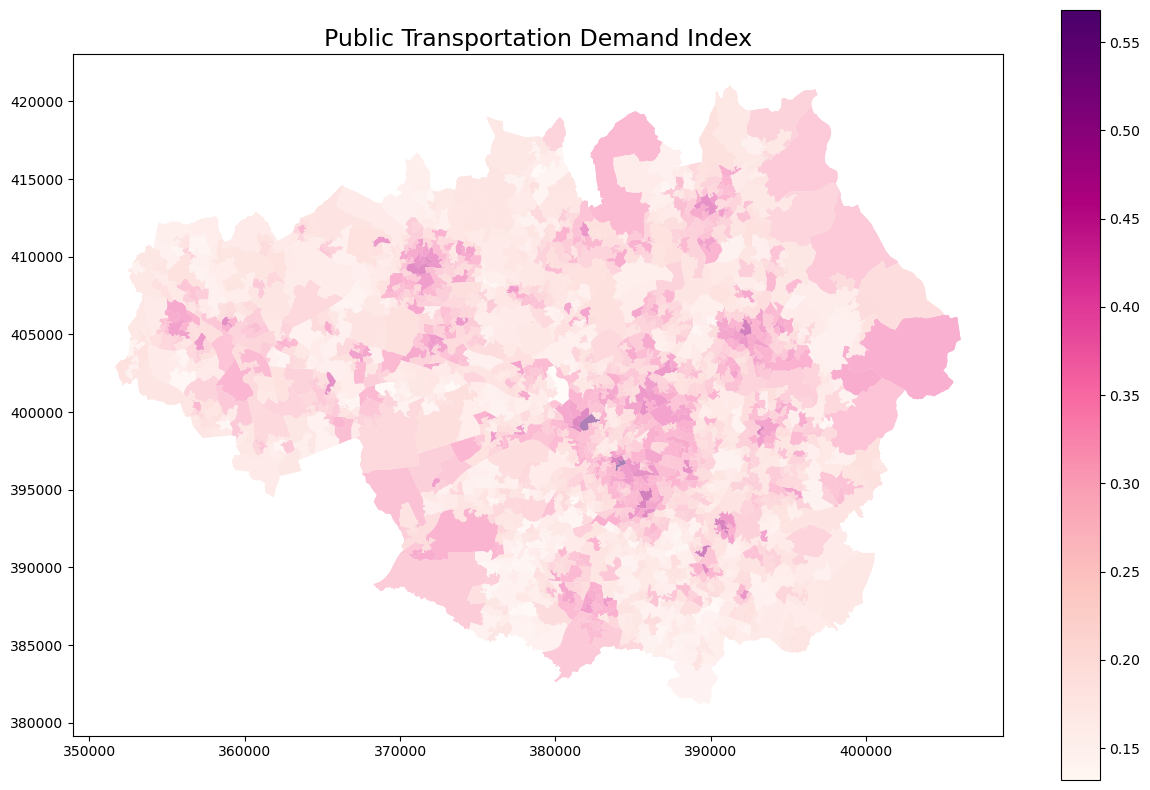

In [32]:
## Set up the plots
fig, ax = plt.subplots(1,1 , figsize=(15, 10))

## Plot Demand Index Map
pt_supply_demand_sorted.plot(ax=ax, column="pt_demand", legend=True, cmap="RdPu")
lsoa.plot(ax=ax, facecolor="white", alpha=0.5, edgecolor="none", linewidth=0.5)
ax.set_title("Public Transportation Demand Index", fontsize=17)
#ax.axis("off")

## Plot Ranks

In [33]:
## Define the the number of lsoa for each percentage
top_3_percent = int((len(pt_supply_demand_sorted)) * 3/100)
top_5_percent = int((len(pt_supply_demand_sorted)) * 5/100)
top_10_percent = int((len(pt_supply_demand_sorted)) * 10/100)
top_15_percent = int((len(pt_supply_demand_sorted)) * 15/100)
top_25_percent = int((len(pt_supply_demand_sorted)) * 25/100)

## Filter the lsoa for each percentage
pt_supply_demand_3 = pt_supply_demand_sorted[pt_supply_demand_sorted["diff_rank"] <= top_3_percent]
pt_supply_demand_5 = pt_supply_demand_sorted[pt_supply_demand_sorted["diff_rank"] <= top_5_percent]
pt_supply_demand_10 = pt_supply_demand_sorted[pt_supply_demand_sorted["diff_rank"] <= top_10_percent]
pt_supply_demand_15 = pt_supply_demand_sorted[pt_supply_demand_sorted["diff_rank"] <= top_15_percent]
pt_supply_demand_25 = pt_supply_demand_sorted[pt_supply_demand_sorted["diff_rank"] <= top_25_percent]

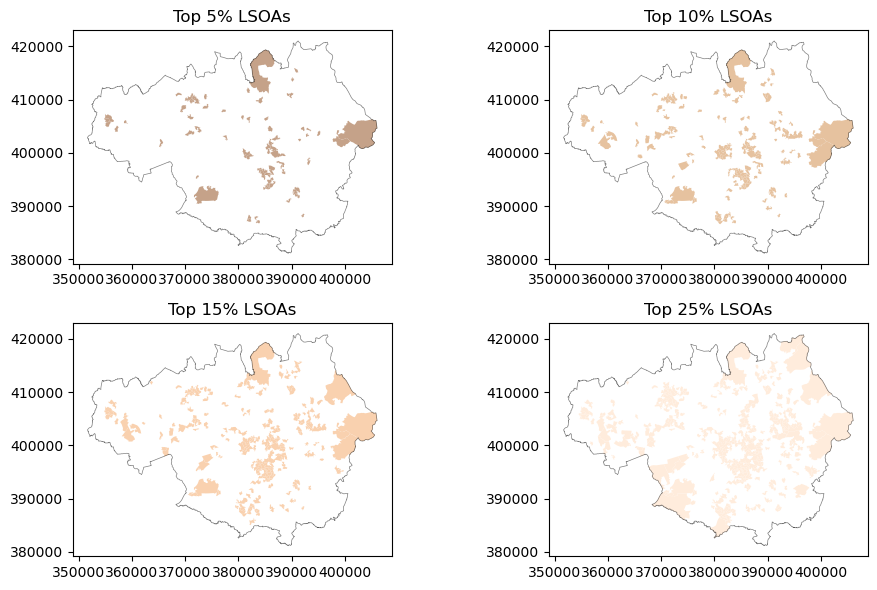

In [34]:
## Set up the plots
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

## Plot top 5% LSOAs
pt_supply_demand_5.plot(ax=axes[0,0], facecolor="saddlebrown", legend=False)
lsoa_outline.plot(ax=axes[0,0], facecolor="w", alpha=0.5, edgecolor="black", linewidth=0.5)
axes[0,0].set_title('Top 5% LSOAs')
#axes[0,0].axis("off") 

## Plot top 10% LSOAs
pt_supply_demand_10.plot(ax=axes[0,1], facecolor="peru", legend=False)
lsoa_outline.plot(ax=axes[0,1], facecolor="w", alpha=0.5, edgecolor="black", linewidth=0.5)
axes[0,1].set_title('Top 10% LSOAs')
#axes[0,1].axis("off") 

## Plot top 15% LSOAs
pt_supply_demand_15.plot(ax=axes[1,0], facecolor="sandybrown", legend=False)
lsoa_outline.plot(ax=axes[1,0], facecolor="w", alpha=0.5, edgecolor="black", linewidth=0.5)
axes[1,0].set_title('Top 15% LSOAs')
#axes[1,0].axis("off") 

## Plot top 25% LSOAs
pt_supply_demand_25.plot(ax=axes[1,1], facecolor="peachpuff", legend=False)
lsoa_outline.plot(ax=axes[1,1], facecolor="w", alpha=0.5, edgecolor="black", linewidth=0.5)
axes[1,1].set_title('Top 25% LSOAs')
#axes[1, 1].axis("off") 

## Display the plots
plt.tight_layout()
plt.show()

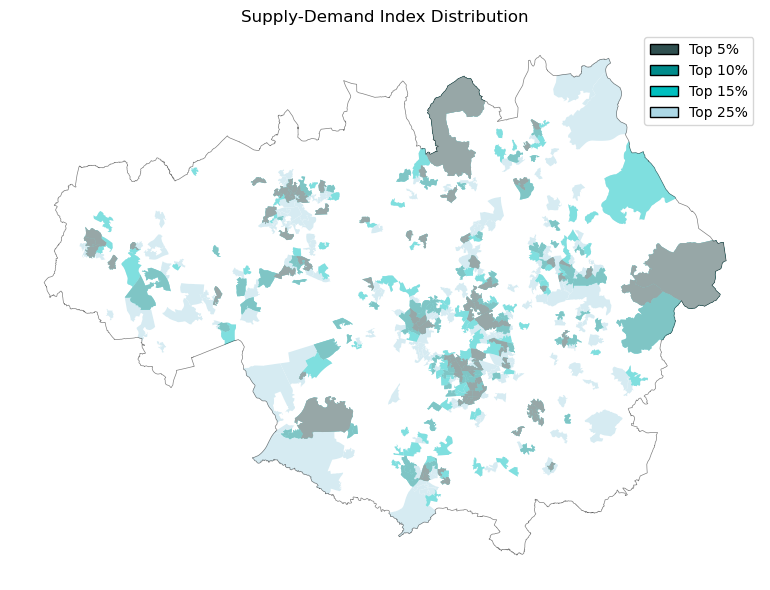

In [35]:
## Set up the plots
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

## Plot top 5% LSOAs
pt_supply_demand_25.plot(ax=ax, facecolor="lightblue", legend=False)
pt_supply_demand_15.plot(ax=ax, facecolor="c", legend=False)
pt_supply_demand_10.plot(ax=ax, facecolor="darkcyan", legend=False)
pt_supply_demand_5.plot(ax=ax, facecolor="darkslategray", legend=False)
lsoa_outline.plot(ax=ax, facecolor="w", alpha=0.5, edgecolor="black", linewidth=0.5)

## Display the plots
legend_elements = [
    Patch(facecolor='darkslategray', edgecolor='black', label='Top 5%'),
    Patch(facecolor='darkcyan', edgecolor='black', label='Top 10%'),
    Patch(facecolor='c', edgecolor='black', label='Top 15%'),
    Patch(facecolor='lightblue', edgecolor='black', label='Top 25%')
]
ax.legend(handles=legend_elements, loc='upper right')
ax.set_title('Supply-Demand Index Distribution')
ax.axis("off")
plt.tight_layout()
plt.show()

In [36]:
## Export to shapefile

pt_supply_demand_3.to_file("Data/fixed_supply_demand_percentile/pt_supply_demand_3.shp")
pt_supply_demand_5.to_file("Data/fixed_supply_demand_percentile/pt_supply_demand_5.shp")
pt_supply_demand_10.to_file("Data/fixed_supply_demand_percentile/pt_supply_demand_10.shp")
pt_supply_demand_15.to_file("Data/fixed_supply_demand_percentile/pt_supply_demand_15.shp")
pt_supply_demand_25.to_file("Data/fixed_supply_demand_percentile/pt_supply_demand_25.shp")

pt_supply_demand_sorted.to_file("Data/fixed_supply_demand_sorted/pt_supply_demand_sorted.shp")

/tmp/ipykernel_663/855583312.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  pt_supply_demand_3.to_file("Data/fixed_supply_demand_percentile/pt_supply_demand_3.shp")
/tmp/ipykernel_663/855583312.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  pt_supply_demand_5.to_file("Data/fixed_supply_demand_percentile/pt_supply_demand_5.shp")
/tmp/ipykernel_663/855583312.py:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  pt_supply_demand_10.to_file("Data/fixed_supply_demand_percentile/pt_supply_demand_10.shp")
/tmp/ipykernel_663/855583312.py:6: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  pt_supply_demand_15.to_file("Data/fixed_supply_demand_percentile/pt_supply_demand_15.shp")
/tmp/ipykernel_663/855583312.py:7: UserWarning: Column names longer than 10 characters will 